---
#  **Exploratory Data Analysis** <a class="anchor" id="1"></a>
---

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [8]:
Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/HEART DISEASE PROJECT/Data/cleaned_data_1.csv')
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,AgeCategory
0,52,Male,typical angina,125,212,lower then 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0,40-60
1,53,Male,typical angina,140,203,heigher then 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0,40-60
2,70,Male,typical angina,145,174,lower then 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0,60-80
3,61,Male,typical angina,148,203,lower then 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0,60-80
4,62,Female,typical angina,138,294,heigher then 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,normal,0,60-80


In [9]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0
target,296.0,0.540541,0.499198,0.0,0.0,1.0,1.00,1.0


In [10]:
Data['AgeCategory'].unique()

array(['40-60', '60-80', '20-40'], dtype=object)

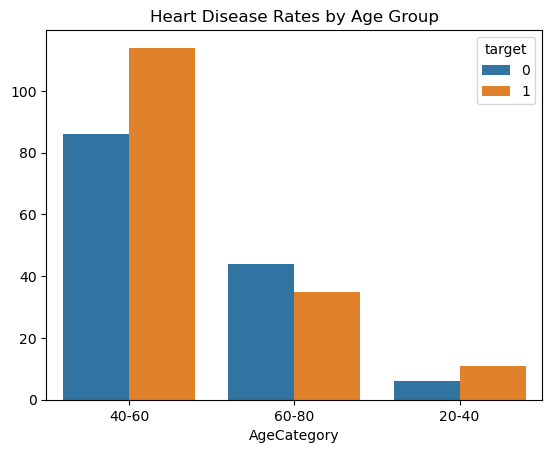

In [11]:

# Plot heart disease by age group
sns.countplot(data=Data, x='AgeCategory', hue='target')

plt.title('Heart Disease Rates by Age Group')
plt.ylabel('')
plt.show()

Observation:

1. Most Heart Diease Rates indicated AgeGroup (40-60)
2. Very few Heart Diease Rates indicated AgeGroup (20-40)


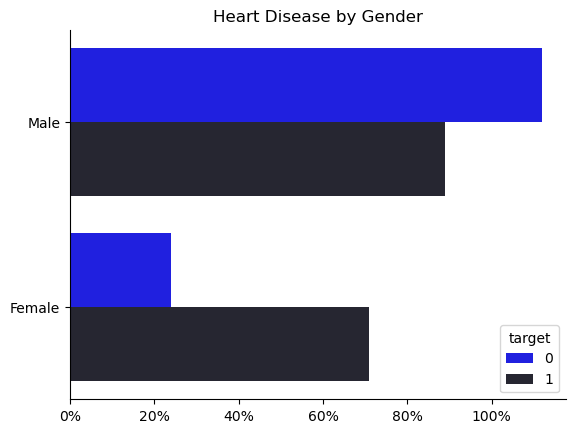

In [18]:
# Plot heart disease rates by gender


sns.countplot(data=Data, y='sex', hue='target', palette= 'dark:b_r')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))

sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.title('Heart Disease by Gender')

plt.show()

Observation:

1. Disease indicated mostly female

In [13]:
### Create a list including only categorical features

cat_features = [feature for feature in Data.columns if Data[feature].dtypes == 'O']
cat_features

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_electrocardiogram',
 'exercise_induced_angina',
 'st_slope',
 'thalassemia',
 'AgeCategory']

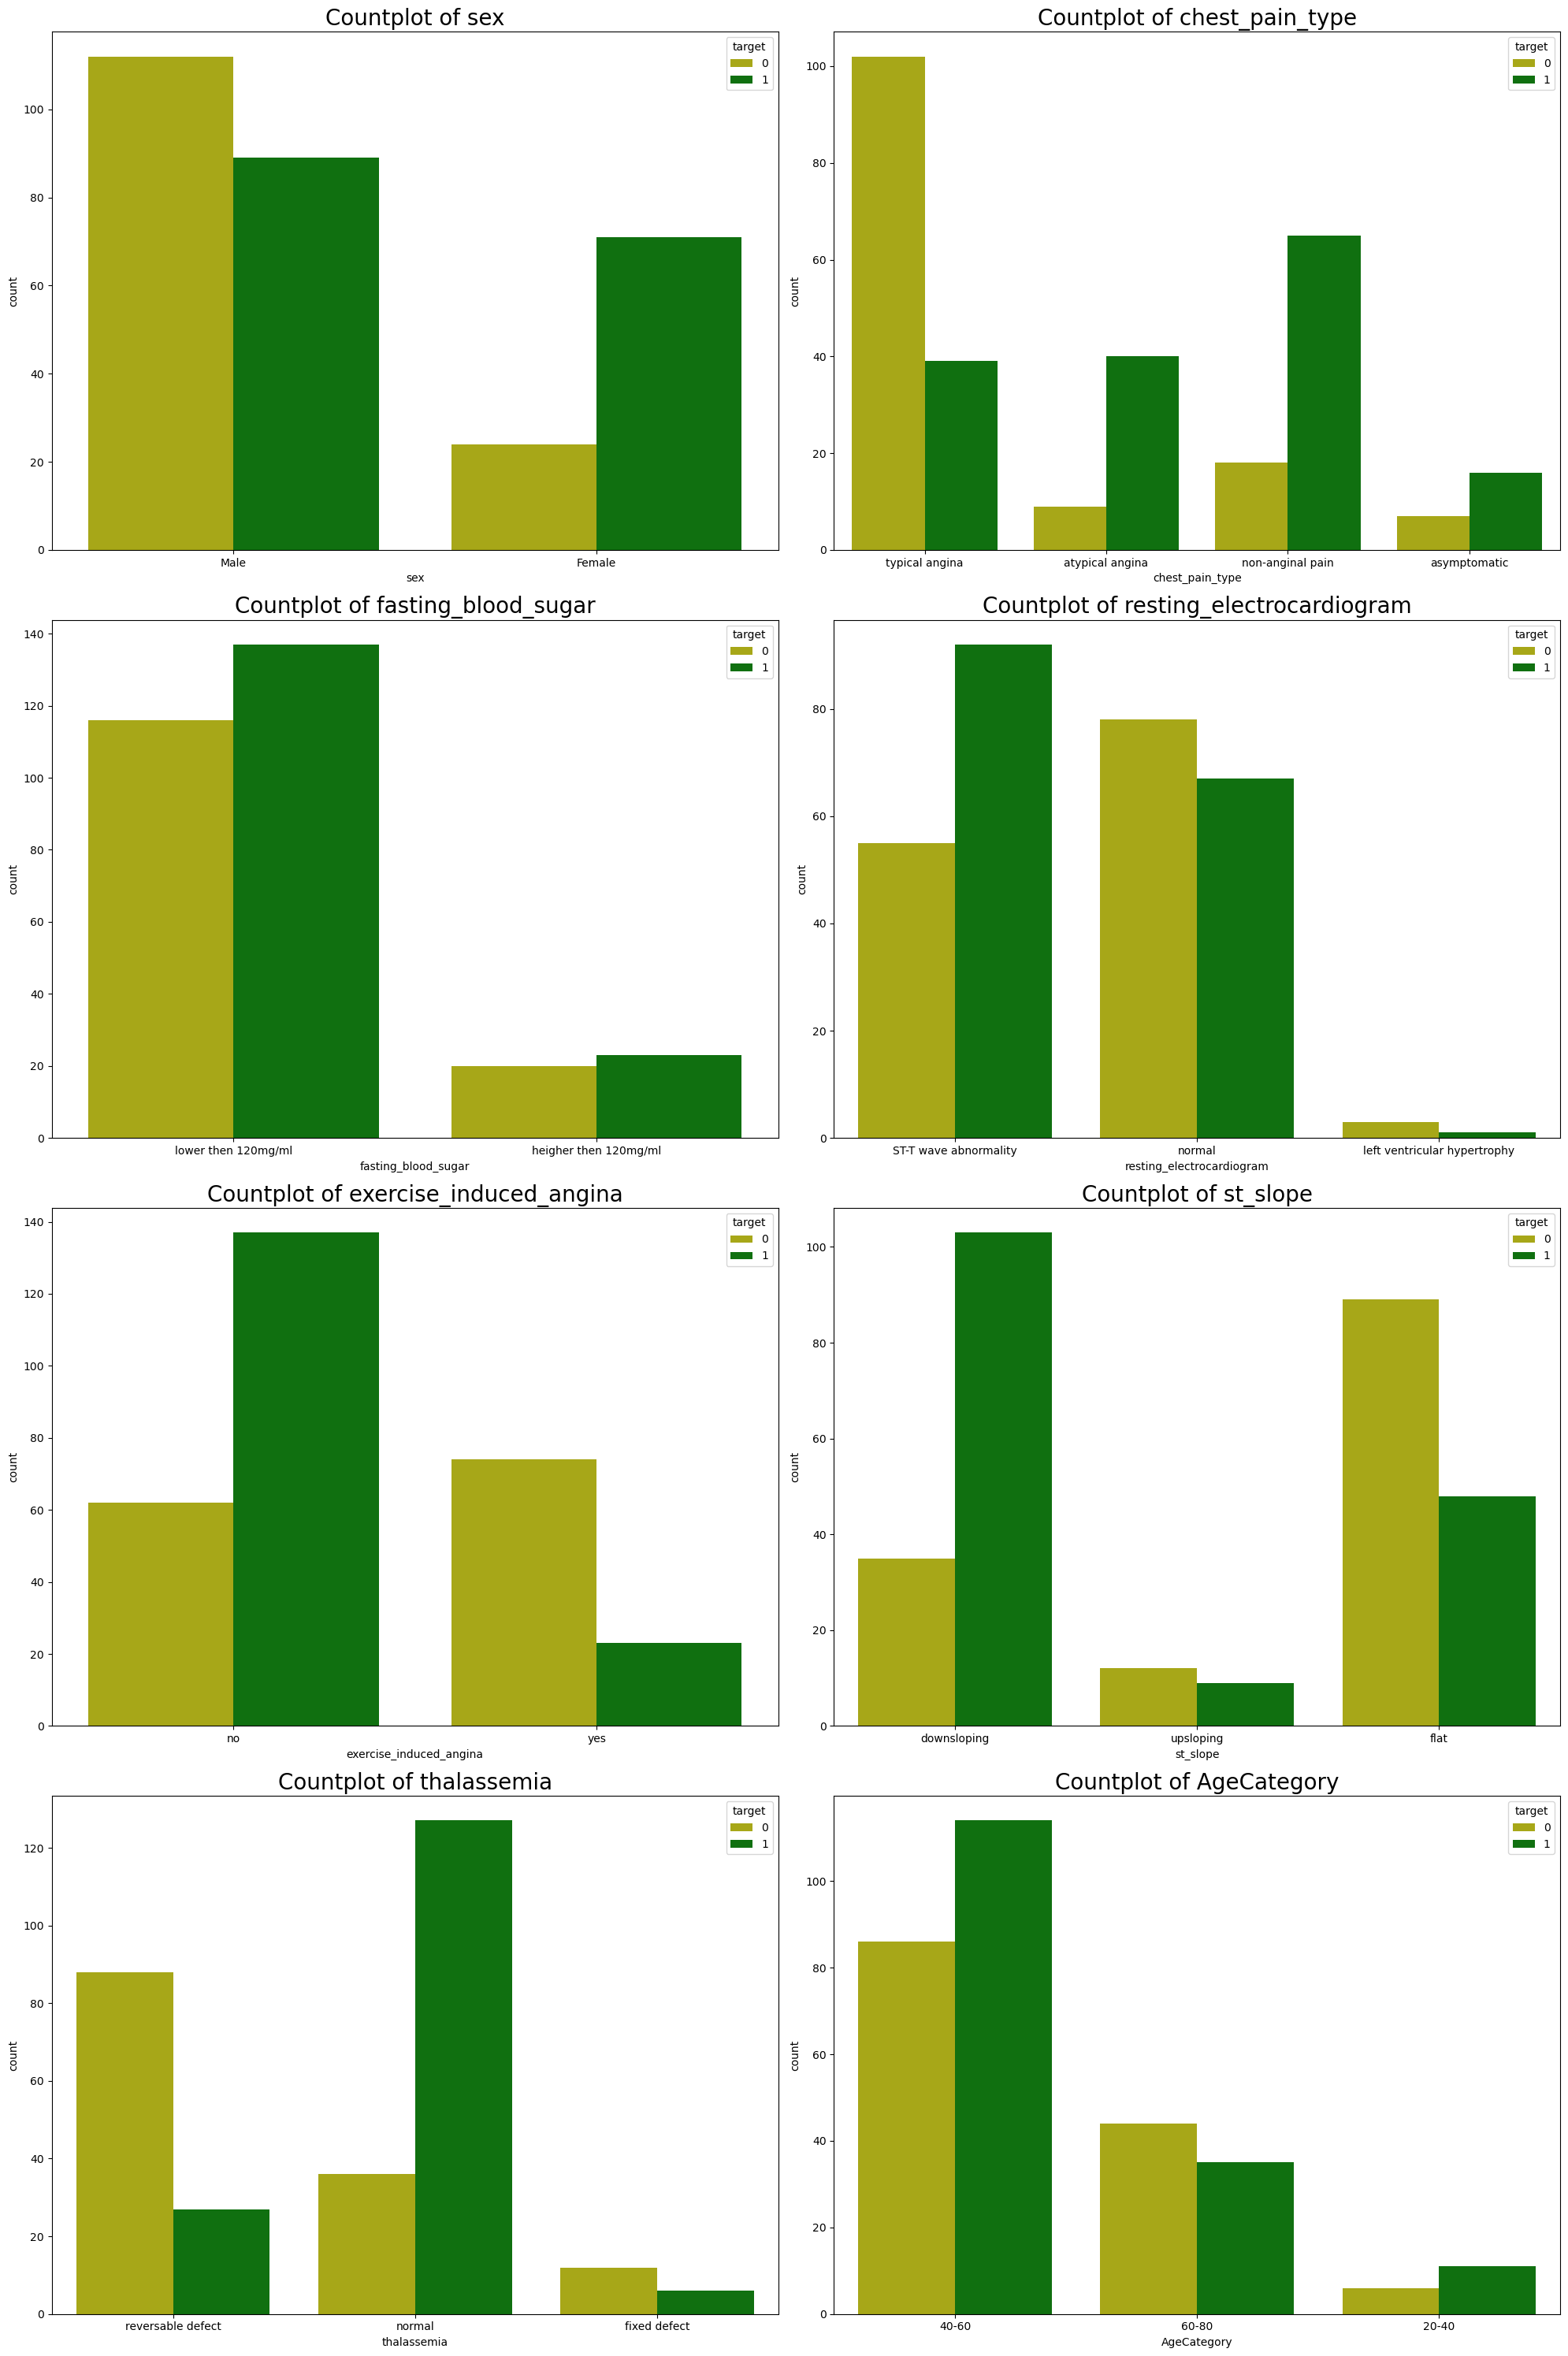

In [42]:
# Create a 2x4 grid for the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # Adjust figure size

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Loop through each feature and corresponding subplot axis
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='target', data=Data, ax=axes[i],  palette=['y','g'])
    axes[i].set_title(f'Countplot of {feature}', fontsize = 20)  # Optional: Add titles
    

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_51877/407068230.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


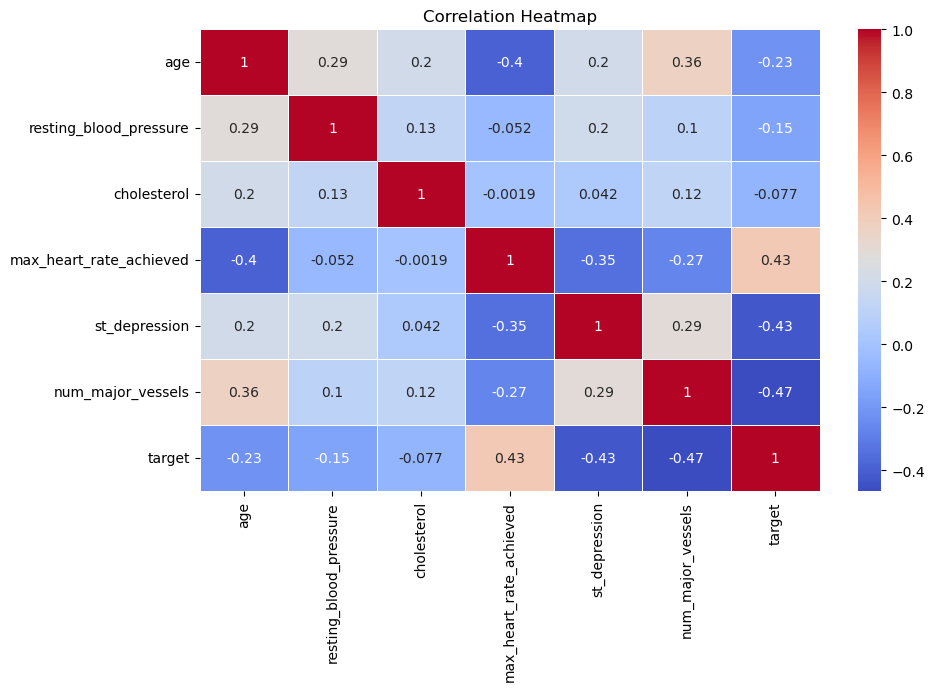

In [15]:
# Generate correlation matrix
corr = Data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()